In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def read_data(filepath):
    price = []
    time = []
    
    with open(filepath) as f:
        lines = f.readlines()[1:]

    for data in lines:
        curr_time = float(data.split(",")[0])
        curr_price = float(data.split(",")[1][:-1])
        time += [curr_time]
        price += [curr_price]
        
    return np.array(price), np.array(time)

In [3]:
filepath = "../data/price_usd_close"

# loading the data
price, time = read_data(filepath)
time_shifted = time - time[0]

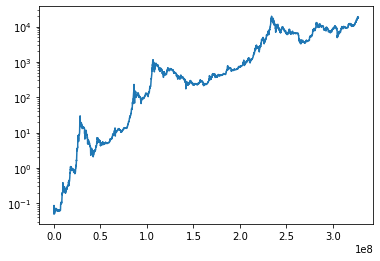

In [4]:
# plotting the data.
# We can see that the price follows a exponential increase, because the following plot is roughly linear.
plt.semilogy(time_shifted, price)
plt.savefig("price.png")

In [5]:
# Two important properties : seasonality and stationarity
# We will first analyse the seasonnality of the data, this will give us information such as at ahat frequency (in days) does the bitcoin price change, and also does it start.
# After we will focus on the stationarity, does the local distribution of the price stays the same in a given period.

In [6]:
# To analyse the seasonality of the bitcoin, we can make a fourier analysis to extract the most proeminent frequencies.
# Amplitude of the fft, or the frequencies values: describes at what frequency, in the data.
# Phase of the fft, or how the phase values: interresting to understand the dynamic of the price, when it starts
# if the output have a random white noise trend, then there is no evidence of principal frequence component(s).
price_fouried = scipy.fft.fft(price)

8808.612495066169


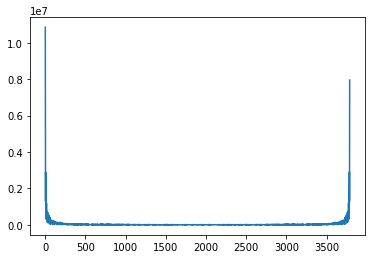

In [7]:
print(np.absolute(price_fouried[2000]))
plt.plot(np.absolute(price_fouried))
plt.savefig("magnitude.png")

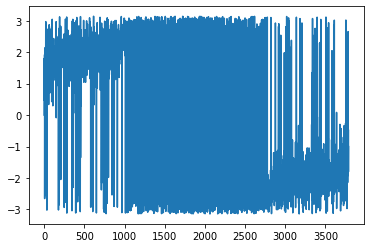

In [8]:
plt.plot(np.angle(price_fouried))
plt.savefig("phase_fft.png")

In [9]:
# now we wil analyse the stationarity of the price
# if the data is stationarity, then a model can more easily predict its value (because of lessexternal perturbation)
#units in days
win_size = 15 #distribution of the data is calculated within 15 days
slide = 60 #we slide up to -/+ 60 days
corr = []

def data_distribution(inp):
    return np.histogram(inp, range=(0, 20000), bins=500, density=True)[0]

# loop through al timestamps
for i in np.arange(slide + int(win_size/2), len(price) - slide - int(win_size/2)):
    idx = i-int(win_size/2)
    # distribution of the price (over price from day -7.5 to day +7.5), the fixed distributioin
    fixed_price = price[idx:int(idx + win_size)]
    fixed_distrib = data_distribution(fixed_price)
    curr_corr = []
     # compare to each distribution at different timestamps (sliding from -30 to +30), the moving distribution 
    for offset in np.arange(-slide, slide + 1):
        idx = offset + i - int(win_size/2)
        moving_price = price[idx:(idx + win_size)]
        moving_distrib = data_distribution(moving_price)
        curr_corr += [np.correlate(fixed_distrib, moving_distrib)]
    curr_corr = curr_corr / np.max(curr_corr)    
    corr += [curr_corr]    
    print("day {}".format(i))
corr = np.array(corr)[:, :, 0]

day 67
day 68
day 69
day 70
day 71
day 72
day 73
day 74
day 75
day 76
day 77
day 78
day 79
day 80
day 81
day 82
day 83
day 84
day 85
day 86
day 87
day 88
day 89
day 90
day 91
day 92
day 93
day 94
day 95
day 96
day 97
day 98
day 99
day 100
day 101
day 102
day 103
day 104
day 105
day 106
day 107
day 108
day 109
day 110
day 111
day 112
day 113
day 114
day 115
day 116
day 117
day 118
day 119
day 120
day 121
day 122
day 123
day 124
day 125
day 126
day 127
day 128
day 129
day 130
day 131
day 132
day 133
day 134
day 135
day 136
day 137
day 138
day 139
day 140
day 141
day 142
day 143
day 144
day 145
day 146
day 147
day 148
day 149
day 150
day 151
day 152
day 153
day 154
day 155
day 156
day 157
day 158
day 159
day 160
day 161
day 162
day 163
day 164
day 165
day 166
day 167
day 168
day 169
day 170
day 171
day 172
day 173
day 174
day 175
day 176
day 177
day 178
day 179
day 180
day 181
day 182
day 183
day 184
day 185
day 186
day 187
day 188
day 189
day 190
day 191
day 192
day 193
day 194
day 195
d

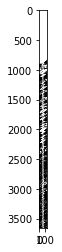

In [10]:
plt.imshow(corr, cmap="gray")
plt.imsave("stationnarity.png", corr, cmap = "gray")